# Problem Statement and Data Description

### Customer Churn Prediction(Classification)


A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.
Your task as a data scientist would be to predict the propensity to churn for each customer.


### Data description 

## I. Demographic information about customers
-	customer_id - Customer id 
-   vintage - Vintage of the customer with the bank in a number of days 
-	age - Age of customer 
-	gender - Gender of customer 
-	dependents - Number of dependents 
-	occupation - Occupation of the customer 
-	city - City of the customer (anonymized) 
## II. Customer Bank Relationship
-	customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High) 
-	branch_code - Branch Code for a customer account 
-	days_since_last_transaction - No of Days Since Last Credit in Last 1 year 
## III. Transactional Information
-	current_balance - Balance as of today 
-	previous_month_end_balance - End of Month Balance of previous month 
-	average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter 
-	average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous       quarter 
-	current_month_credit - Total Credit Amount current month 
-	previous_month_credit - Total Credit Amount previous month 
-	current_month_debit - Total Debit Amount current month 
-	previous_month_debit - Total Debit Amount previous month 
-	current_month_balance - Average Balance of current month 
-	previous_month_balance - Average Balance of previous month 
-	churn - Average balance of customer falls below minimum balance in the next quarter (1/0) 


## Loading The Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [7]:
data.shape

(28382, 21)

In [8]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [9]:
data.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [10]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

## Univariate Anlysis

##### Univariate Analysis of CONTINUOUS VARIABLES

Text(0.5, 0, 'vinatge')

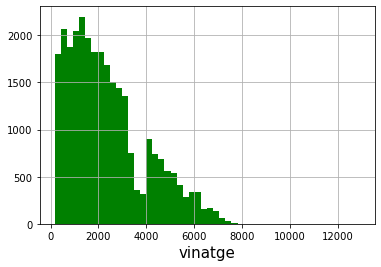

In [11]:
data['vintage'].hist(bins=50,color='g')
plt.xlabel('vinatge',fontsize=15)

- The distribution of 'vintage' variable is slightly right skewed. 
- We can take square root to see a normal distribution

In [12]:
sqrt=np.sqrt(data['vintage'])

Text(0.5, 0, 'vinatge')

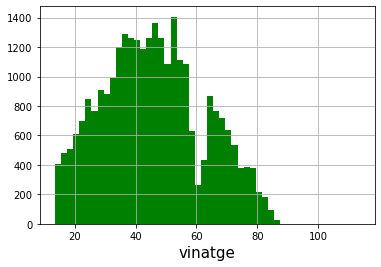

In [13]:
sqrt.hist(bins=50,color='g')
plt.xlabel('vinatge',fontsize=15)

Text(0.5, 0, 'city')

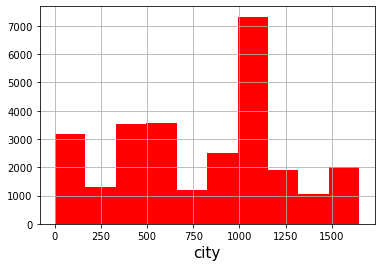

In [14]:
data['city'].hist(bins=10,color='r')
plt.xlabel('city',fontsize=15)

Text(0.5, 1.0, 'barplot')

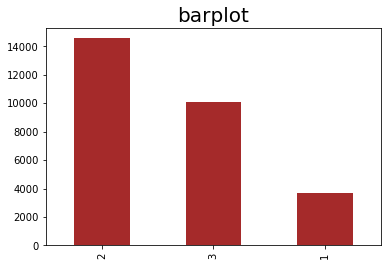

In [15]:
data['customer_nw_category'].value_counts().plot.bar(color='brown')
plt.title('barplot',fontsize=20)

Text(0.5, 0, 'Age')

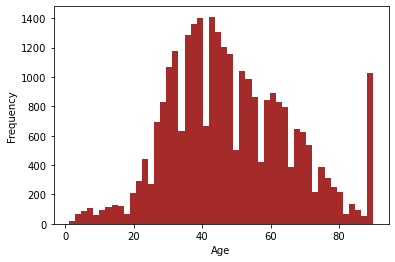

In [16]:
data['age'].plot.hist(bins=50,color='brown')
plt.xlabel('Age')

##### Univariate Analysis Of Categorical Variables

In [17]:
cols=data[['gender','occupation','churn']]
for i in cols:
    print('********',i,'*********')
    print(data[i].value_counts())
    print('')
    print('')

******** gender *********
Male      16548
Female    11309
Name: gender, dtype: int64


******** occupation *********
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64


******** churn *********
0    23122
1     5260
Name: churn, dtype: int64




Text(0.5, 1.0, 'Bar plot')

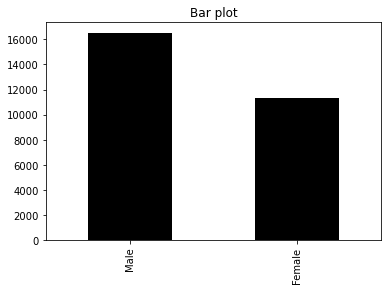

In [18]:
data['gender'].value_counts().plot.bar(color='black')
plt.title('Bar plot')

Text(0.5, 1.0, 'Bar plot')

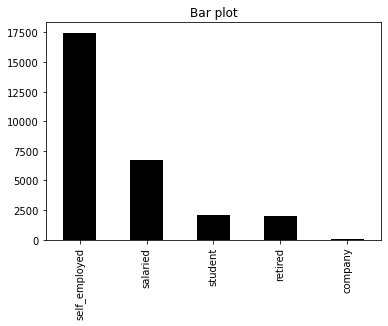

In [19]:
data['occupation'].value_counts().plot.bar(color='black')
plt.title('Bar plot')

<AxesSubplot:>

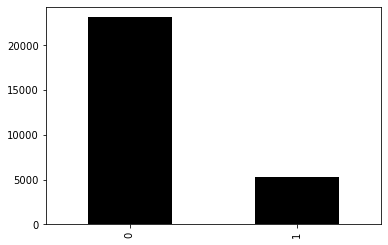

In [20]:
data['churn'].value_counts().plot.bar(color='black')

### UNIVARIATE ANALYSIS DONE^^^

## BIVARIATE ANALYSIS

In [21]:
data.corr()


,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.008616,0.000743,0.009618,-0.000286,0.010267,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,0.036987,0.044200,-0.167366,-0.380714,-0.088744,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,-0.000612,0.015439,-0.076532,-0.058990,-0.016679,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008616,0.036987,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.079834,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.000743,0.044200,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.004309,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,0.009618,-0.167366,-0.076532,0.013134,0.006613,1.000000,0.235059,0.049531,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.380714,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.038708,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.010267,-0.088744,-0.016679,-0.079834,-0.004309,0.049531,0.038708,1.000000,-0.019990,-0.014400,-0.012709,-0.006384,-0.033131,-0.071657,-0.039165,-0.070192,-0.017837,-0.011738,-0.055830
current_balance,0.006589,0.002986,0.054346,-0.003070,-0.005654,-0.058314,0.000181,-0.019990,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,0.000216,-0.004089,-0.059854,0.000214,-0.014400,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


In [22]:
data['age'].corr(data['vintage'])

0.22739000163756054

<AxesSubplot:xlabel='age', ylabel='vintage'>

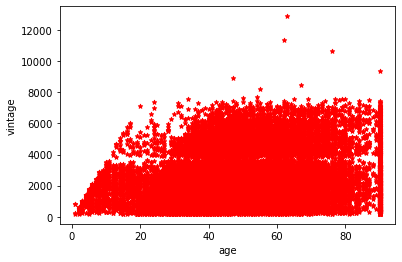

In [23]:
data.plot.scatter('age','vintage',marker='*',color='r')

In [24]:
data['dependents'].corr(data['vintage'])

0.036986739166647804

<AxesSubplot:xlabel='city', ylabel='vintage'>

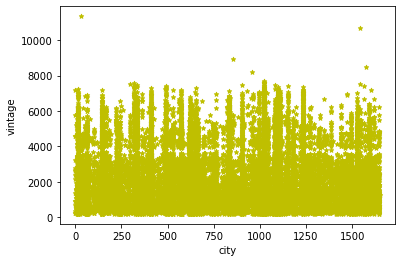

In [25]:
data.plot.scatter('city','vintage',marker='*',color='y')

In [26]:
df=data.groupby('gender')['age'].mean()
df

gender
Female    46.249536
Male      48.239425
Name: age, dtype: float64

Text(0.5, 1.0, 'gender[age]mean')

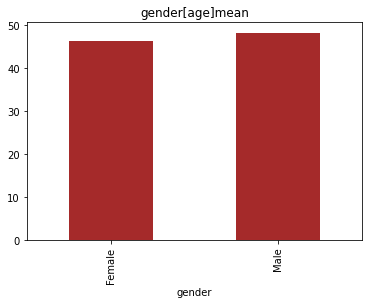

In [27]:
df.plot.bar(color='brown')
plt.title('gender[age]mean')

In [28]:
nw=data.groupby('customer_nw_category')['age'].mean()
nw

customer_nw_category
1    51.109404
2    48.483962
3    46.746835
Name: age, dtype: float64

Text(0.5, 1.0, 'nw_category[age]mean')

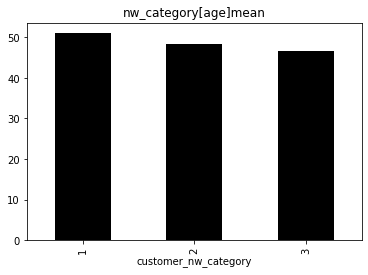

In [29]:
nw.plot.bar(color='black')
plt.title('nw_category[age]mean')

In [30]:
pd.crosstab(data['gender'],data['churn'])

churn,0,1
gender,,
Female,9324,1985
Male,13379,3169


In [31]:
pd.crosstab(data['customer_nw_category'],data['churn'])

churn,0,1
customer_nw_category,,
1,3001,710
2,11953,2606
3,8168,1944


In [32]:
pd.crosstab(data['occupation'],data['churn'])

churn,0,1
occupation,,
company,36,4
retired,1719,305
salaried,5557,1147
self_employed,14009,3467
student,1734,324


### Bivariate Analysis Done^^^

## Missing Value Treatment

In [33]:
data .isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [34]:
#is_null=[]
#for i in data.columns:
    #if (data[i].isnull()==0):
        #is_null.append(i)



is_null=[]
for i in data.columns:
    if (data[i].isnull().sum()!=0):
        is_null.append(i)
     

In [35]:
is_null

['gender', 'dependents', 'occupation', 'city', 'days_since_last_transaction']

In [36]:
from statistics import mode,mean

In [37]:
#filling the missing values in 'gender','dependent','occupation' columns by taking mode
for i in is_null[:3]:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [38]:
data[is_null[:3]].isnull().sum()

gender        0
dependents    0
occupation    0
dtype: int64

In [39]:
##filling the missing values in 'city', 'days_since_last_transaction' columns by taking mean
for i in is_null[3:]:
    data[i].fillna(data[i].mean(),inplace=True)

In [40]:
data[is_null[3:]].isnull().sum()

city                           0
days_since_last_transaction    0
dtype: int64

In [41]:
#now there is no missing value in dataset
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

### Missing Value Treatment Done

## Outlier Treatment

<AxesSubplot:>

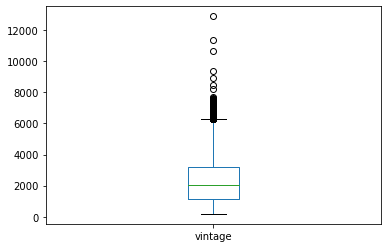

In [42]:
data['vintage'].plot.box()

In [43]:
data.loc[data['vintage']>5500,'vintage']=data['vintage'].mean()

<AxesSubplot:>

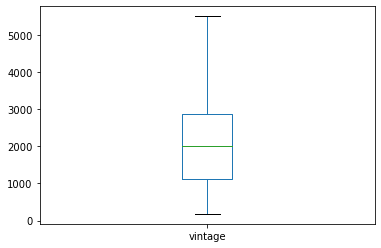

In [44]:
data['vintage'].plot.box()

<AxesSubplot:>

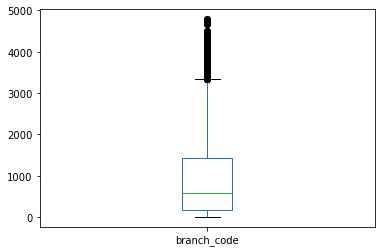

In [45]:
data['branch_code'].plot.box()

In [46]:
data.loc[data['branch_code']>2700,'branch_code']=data['branch_code'].mean()

<AxesSubplot:>

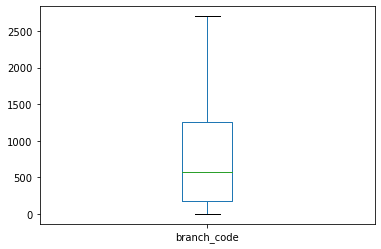

In [47]:
data['branch_code'].plot.box()

<AxesSubplot:>

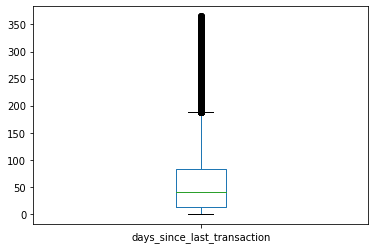

In [48]:
data['days_since_last_transaction'].plot.box()

In [49]:
data.loc[data['days_since_last_transaction']>155,'days_since_last_transaction']=data['days_since_last_transaction'].mean()

<AxesSubplot:>

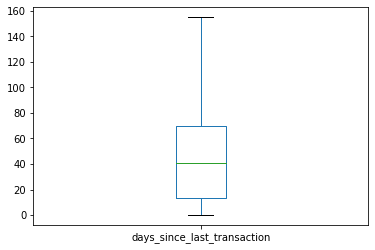

In [50]:
data['days_since_last_transaction'].plot.box()

### Outlier Treatment Done

## Data Exploration and Data Manipulation

In [51]:
bins=[0,12,19,30,60,90]
group=['child','teenager','young_adult','middle_aged', 'senior_citizen']
temp=pd.cut(data['age'], bins, labels=group)

In [52]:
temp

0        senior_citizen
1           middle_aged
2           middle_aged
3        senior_citizen
4           middle_aged
              ...      
28377             child
28378       middle_aged
28379       middle_aged
28380       middle_aged
28381          teenager
Name: age, Length: 28382, dtype: category
Categories (5, object): ['child' < 'teenager' < 'young_adult' < 'middle_aged' < 'senior_citizen']

<AxesSubplot:>

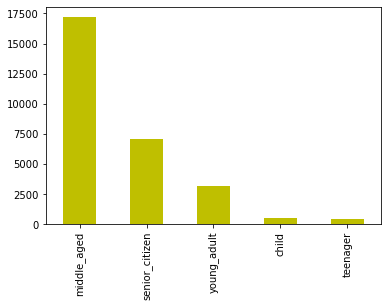

In [53]:
temp.value_counts().plot.bar(color='y')

In [54]:
data.drop_duplicates().shape,data.shape

((28382, 21), (28382, 21))

#### no duplicate values

In [55]:
data.nunique()

customer_id                       28382
vintage                            4589
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1605
customer_nw_category                  3
branch_code                        2344
days_since_last_transaction         157
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
dtype: int64

###### there are only 3  and 2 unique values in 'customer_nw_category' and 'churn' columns

In [56]:
cols=data[['customer_nw_category','churn']]

for i in cols:
    print('>>>>>>>>>',i,'<<<<<<<<<<')
    print(data[i].value_counts())
    print('')
    print('')

>>>>>>>>> customer_nw_category <<<<<<<<<<
2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64


>>>>>>>>> churn <<<<<<<<<<
0    23122
1     5260
Name: churn, dtype: int64




In [58]:
#changing the data types of 'customer_nw_category' and 'churn'
data=data.astype({'customer_nw_category':'object','churn':'object'})

In [59]:
data.dtypes

customer_id                         int64
vintage                           float64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category               object
branch_code                       float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                              object
dtype: object

In [60]:
cols=list(data.columns) 
cols

['customer_id',
 'vintage',
 'age',
 'gender',
 'dependents',
 'occupation',
 'city',
 'customer_nw_category',
 'branch_code',
 'days_since_last_transaction',
 'current_balance',
 'previous_month_end_balance',
 'average_monthly_balance_prevQ',
 'average_monthly_balance_prevQ2',
 'current_month_credit',
 'previous_month_credit',
 'current_month_debit',
 'previous_month_debit',
 'current_month_balance',
 'previous_month_balance',
 'churn']

In [61]:
data.replace({'occupation':{'self_employed':0,'salaried':1,'student':2,'retired':3,'company':4}},inplace=True)


In [62]:
data['occupation'].value_counts()

0    17556
1     6704
2     2058
3     2024
4       40
Name: occupation, dtype: int64

In [63]:
data['gender'].replace({'Male':'gender_male','Female':'gender_female'},inplace=True)
data['gender'].value_counts()


gender_male      17073
gender_female    11309
Name: gender, dtype: int64

In [64]:
gender=pd.get_dummies(data['gender'])

In [65]:
churn_cleaned=pd.concat([data.drop(['gender'],axis=1),gender],axis=1)
churn_cleaned.head(10)

,customer_id,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,gender_female,gender_male
0,1,3135.000000,66,0.0,0,187.000000,2,755.000000,69.997814,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1
1,2,310.000000,35,0.0,0,796.109576,2,925.975019,60.000000,5390.37,...,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,1
2,4,2356.000000,31,0.0,1,146.000000,2,41.000000,69.997814,3913.16,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,1
3,5,478.000000,90,0.0,0,1020.000000,2,582.000000,147.000000,2291.91,...,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0,1
4,6,2531.000000,42,2.0,0,1494.000000,3,388.000000,58.000000,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,1
5,7,263.000000,42,0.0,0,1096.000000,2,1666.000000,60.000000,15202.20,...,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,1,0
6,8,2364.336446,72,0.0,3,1020.000000,1,1.000000,98.000000,7006.93,...,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,0,1
7,9,1145.000000,46,0.0,0,623.000000,2,317.000000,69.997814,10096.58,...,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,0,1
8,10,2132.000000,31,0.0,1,1096.000000,2,925.975019,19.000000,1355.86,...,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,0,1
9,11,3379.000000,40,3.0,0,1020.000000,2,38.000000,0.000000,4957.95,...,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,0,1


In [73]:
data.shape,churn_cleaned.shape

((28382, 21), (28382, 22))

In [75]:
churn_cleaned.to_csv(r'C:\Users\harsh\OneDrive\Documents\Churn_prediction_cleaned.csv',index=False,header=True)

#####  Data is cleaned^^^

##### 